<a href="https://colab.research.google.com/github/J0SAL/Learning-ML/blob/main/Krish%20Naik/12.%20Finding%20Optimal%20Threshold/ROC_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Select the right threshold using ROC curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
print(X.shape, y.shape)
print(y)

(2000, 20) (2000,)
[0 0 0 ... 1 1 0]


In [5]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Random forest**

In [8]:

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9843944444444445


In [9]:
ytrain_pred


array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.29, 0.71]])

**Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777



**Adaboost Classifier**

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


**KNNClassifier**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111



Now we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851444444444444


In [21]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.55,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [23]:
final_prediction #mean of the above rows

0      0.880262
1      0.118323
2      0.818783
3      0.747853
4      0.554947
         ...   
595    0.123840
596    0.115345
597    0.876697
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [24]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90623256, 0.90577475, 0.80199934,
       0.8005558 , 0.7830287 , 0.78071156, 0.77297465, 0.77287124,
       0.73208108, 0.73137362, 0.71595844, 0.71393711, 0.66506113,
       0.66243537, 0.60994697, 0.59925354, 0.59396627, 0.59114346,
       0.56588469, 0.56300386, 0.55095371, 0.54389283, 0.53808969,
       0.53719563, 0.53615858, 0.52127948, 0.47200602, 0.47116892,
       0.45169266, 0.43722765, 0.4321034 , 0.39464628, 0.39129719,
       0.35245613, 0.35086612, 0.23698424, 0.23640421, 0.2319954 ,
       0.23146893, 0.21039681, 0.20598417, 0.12551207, 0.1253351 ,
       0.10548439])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
29,0.471169,0.961667
23,0.543893,0.960000
31,0.437228,0.960000
30,0.451693,0.960000
28,0.472006,0.960000
27,0.521279,0.960000
25,0.537196,0.960000
22,0.550954,0.958333
32,0.432103,0.958333
26,0.536159,0.958333


In [27]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

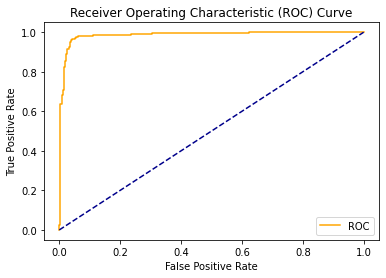

In [28]:
plot_roc_curve(fpr,tpr)
